In [57]:
import numpy
from numpy import linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

$$A + B \to C + D$$

|Symbol|Chemical|
|---|---|
|A|ethyl acetate|
|B|sodium hydroxide|
|C|sodium acetate|
|D|ethanol|


In [58]:
CAo = 0.04 #mol/L
CBo = 0.02 #mol/L (the limiting reagent)
CCo = 0.00 #mol/L
CDo = 0.00 #mol/L
V = 0.2 #L
NAo = CAo*V
NBo = CBo*V
NCo = CCo*V
NDo = CDo*V



In [59]:
import pandas, array

In [60]:
kbatch = numpy.array(pandas.read_excel('kbatch.xlsx'))
kbatch[0,1] #testing 

9.943412

In [61]:
kbatchexp = kbatch[:,1]
kbatchexp #test

array([9.943412, 9.957992, 9.972571, ..., 3.83457 , 3.863729, 3.84915 ])

In [62]:
Kstart = 5.54 #from B solution conductivity testing
Kfinal = 3.85 #average of last k readings

In [63]:
tTot = len(kbatch)
tTot #test

1458

In [117]:
def conversion(K):
    X = []
    n = tTot
    for i in range(n):
        conv = (Kstart-K[i])/(Kstart - Kfinal)
        X.append(conv)
        i += 1
    return(X)


In [65]:
te = linspace(0,tTot,tTot)

In [118]:
XBexp = conversion(kbatchexp)
#XBexp

In [128]:
k = 0.5
n = 1
m = 1

CA = 0.04mL/m3 - XB*CBo  (1:1 stoichiometry);
CA = CAo - XB*CBo;
CB = CBo*(1 - XB)


In [114]:
tspan = linspace(0,1500,1500)

In [132]:
def batchdiff(x,t):
    if x>= 0:
        rA = -k*(((CAo - x*CBo)**m)*((CBo - x*CBo)**n))
        rB = rA
        dCBdt = rB
    else:
        dCBdt = 0
        
    return(dCBdt) 

In [135]:
CB = odeint(batchdiff,0,tspan)
XB = CB/CBo
#XB = odeint(batchdiff, 0, tspan)

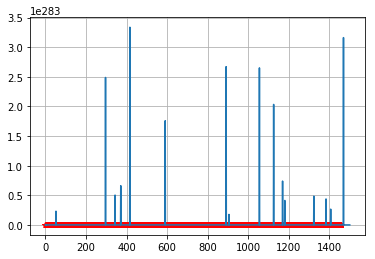

In [136]:
plt.figure(1)
plt.plot(te,XBexp, '*r')
plt.plot(tspan,XB)

plt.grid()
plt.show()